In [2]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import numpy as np

In [3]:
train_images_path = 'dataset/Modi'
train_cleaned_path = 'dataset/Trump'
train_images = sorted(os.listdir(train_images_path))
train_cleaned = sorted(os.listdir(train_cleaned_path))

X = []
y = []

for img in train_images:
    img_path = os.path.join(train_images_path, img)
    im = load_img(img_path,color_mode = 'grayscale',target_size = (540, 260))
    im = img_to_array(im).astype('float32')/255
    X.append(im)
for img in train_cleaned:
    img_path = os.path.join(train_cleaned_path, img)
    im = load_img(img_path,color_mode = 'grayscale', target_size = (540, 260))
    im = img_to_array(im).astype('float32')/255
    y.append(im)
    
X = np.array(X)
Z = np.array(y)

print(X.shape,Z.shape)

(10, 540, 260, 1) (10, 540, 260, 1)


In [4]:
input_img = Input(shape=(540, 260, 1)) 

x = Conv2D(32, (3, 3), activation='relu', padding='same',name='x1')(input_img)
x = MaxPooling2D((2, 2), padding='same',name='x2')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same',name='x3')(x)
x = MaxPooling2D((2, 2), padding='same',name='x4')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same',name='x5')(x)
encoded = MaxPooling2D((2, 2), padding='same',name='x6')(x)



x = Conv2D(16, (3, 3), activation='relu', padding='same',name='x7')(encoded)
x = UpSampling2D((2, 2),name='x8')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same',name='x9')(x)
x = UpSampling2D((2, 2),name='x10')(x)
x = Conv2D(32, (3, 3), activation='relu',name='x11')(x)
x = UpSampling2D((2, 2),name='x12')(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same',name='x13')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')
history = autoencoder.fit(X, X, epochs = 1000, verbose = True)
autoencoder.save('autoencoder1.h5')

Train on 10 samples
Epoch 1/1000
10/10 [==============================] - 6s 580ms/sample - loss: 0.6936
Epoch 2/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.6902
Epoch 3/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.6872
Epoch 4/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.6805
Epoch 5/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.6720
Epoch 6/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.6610
Epoch 7/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.6480
Epoch 8/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.6337
Epoch 9/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.6208
Epoch 10/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.6087
Epoch 11/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.5953
Epoch 12/1000
10/10 [==============================] 

Epoch 98/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4305
Epoch 99/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4299
Epoch 100/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4316
Epoch 101/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4302
Epoch 102/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4294
Epoch 103/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4306
Epoch 104/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4299
Epoch 105/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4291
Epoch 106/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4299
Epoch 107/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4298
Epoch 108/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4289
Epoch 109/1000
10/10 [==============================] - 

Epoch 194/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4251
Epoch 195/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4251
Epoch 196/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4251
Epoch 197/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4251
Epoch 198/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4252
Epoch 199/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4253
Epoch 200/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4255
Epoch 201/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4260
Epoch 202/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4272
Epoch 203/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4285
Epoch 204/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4295
Epoch 205/1000
10/10 [==============================] 

Epoch 290/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4271
Epoch 291/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4250
Epoch 292/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4254
Epoch 293/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4262
Epoch 294/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4249
Epoch 295/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4259
Epoch 296/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4252
Epoch 297/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4246
Epoch 298/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4255
Epoch 299/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4249
Epoch 300/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4245
Epoch 301/1000
10/10 [==============================] 

Epoch 386/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4242
Epoch 387/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4242
Epoch 388/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4238
Epoch 389/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4239
Epoch 390/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4240
Epoch 391/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4239
Epoch 392/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4237
Epoch 393/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4238
Epoch 394/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4238
Epoch 395/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4236
Epoch 396/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4236
Epoch 397/1000
10/10 [==============================] 

Epoch 482/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4227
Epoch 483/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4230
Epoch 484/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4234
Epoch 485/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4233
Epoch 486/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4228
Epoch 487/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4226
Epoch 488/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4229
Epoch 489/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4232
Epoch 490/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4233
Epoch 491/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4231
Epoch 492/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4227
Epoch 493/1000
10/10 [==============================] 

Epoch 578/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4225
Epoch 579/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4225
Epoch 580/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4225
Epoch 581/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4224
Epoch 582/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4224
Epoch 583/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4224
Epoch 584/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4224
Epoch 585/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4224
Epoch 586/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4224
Epoch 587/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4224
Epoch 588/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4224
Epoch 589/1000
10/10 [==============================] 

Epoch 674/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4222
Epoch 675/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4223
Epoch 676/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4223
Epoch 677/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4223
Epoch 678/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4222
Epoch 679/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4222
Epoch 680/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4220
Epoch 681/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4219
Epoch 682/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4219
Epoch 683/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4219
Epoch 684/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4219
Epoch 685/1000
10/10 [==============================] 

Epoch 770/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4268
Epoch 771/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4269
Epoch 772/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4267
Epoch 773/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4267
Epoch 774/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4266
Epoch 775/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4265
Epoch 776/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4264
Epoch 777/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4262
Epoch 778/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4262
Epoch 779/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4261
Epoch 780/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4261
Epoch 781/1000
10/10 [==============================] 

Epoch 866/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4235
Epoch 867/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4234
Epoch 868/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4234
Epoch 869/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4234
Epoch 870/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4234
Epoch 871/1000
10/10 [==============================] - 0s 16ms/sample - loss: 0.4234
Epoch 872/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4234
Epoch 873/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4234
Epoch 874/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4234
Epoch 875/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4233
Epoch 876/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4233
Epoch 877/1000
10/10 [==============================] 

Epoch 962/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4226
Epoch 963/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4228
Epoch 964/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4228
Epoch 965/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4226
Epoch 966/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.4226
Epoch 967/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4227
Epoch 968/1000
10/10 [==============================] - 0s 16ms/sample - loss: 0.4227
Epoch 969/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4226
Epoch 970/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4225
Epoch 971/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4226
Epoch 972/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.4226
Epoch 973/1000
10/10 [==============================] 

<tf.Tensor 'up_sampling2d_14/Identity:0' shape=(None, 540, 260, 32) dtype=float32>

In [6]:
input_img1 = Input(shape=(540, 260, 1))  

y = Conv2D(32, (3, 3), activation='relu', padding='same',name='y1')(input_img1)
y = MaxPooling2D((2, 2), padding='same',name='y2')(y)
y = Conv2D(32, (3, 3), activation='relu', padding='same',name='y3')(y)
y = MaxPooling2D((2, 2), padding='same',name='y4')(y)
y = Conv2D(16, (3, 3), activation='relu', padding='same',name='y5')(y)
encoded1 = MaxPooling2D((2, 2), padding='same',name='y6')(y)


y = Conv2D(16, (3, 3), activation='relu', padding='same',name='y7')(encoded1)
y = UpSampling2D((2, 2),name='y8')(y)
y = Conv2D(32, (3, 3), activation='relu', padding='same',name='y9')(y)
y = UpSampling2D((2, 2),name='y10')(y)
y = Conv2D(32, (3, 3), activation='relu',name='y11')(y)
y = UpSampling2D((2, 2),name='y12')(y)
decoded2 = Conv2D(1, (3, 3), activation='sigmoid', padding='same',name='y13')(y)

autoencoder1 = Model(input_img1, decoded2)
autoencoder1.compile(optimizer='Adam', loss='binary_crossentropy')
history1 = autoencoder1.fit(Z, Z,epochs = 1000, verbose = True)
autoencoder1.save('autoencoder2.h5')

Train on 10 samples
Epoch 1/1000
10/10 [==============================] - 1s 91ms/sample - loss: 0.6924
Epoch 2/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.6901
Epoch 3/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.6876
Epoch 4/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.6857
Epoch 5/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.6840
Epoch 6/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.6812
Epoch 7/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.6781
Epoch 8/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.6744
Epoch 9/1000
10/10 [==============================] - 0s 14ms/sample - loss: 0.6700
Epoch 10/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.6644
Epoch 11/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.6570
Epoch 12/1000
10/10 [==============================] -

Epoch 98/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5210
Epoch 99/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5209
Epoch 100/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5209
Epoch 101/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5208
Epoch 102/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5208
Epoch 103/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5207
Epoch 104/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5206
Epoch 105/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5206
Epoch 106/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5205
Epoch 107/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5204
Epoch 108/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5204
Epoch 109/1000
10/10 [==============================] - 

Epoch 194/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5172
Epoch 195/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5171
Epoch 196/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5171
Epoch 197/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5170
Epoch 198/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5169
Epoch 199/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5169
Epoch 200/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5169
Epoch 201/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5170
Epoch 202/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5170
Epoch 203/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5171
Epoch 204/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5171
Epoch 205/1000
10/10 [==============================] 

Epoch 290/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5159
Epoch 291/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5159
Epoch 292/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5159
Epoch 293/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5158
Epoch 294/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5158
Epoch 295/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5158
Epoch 296/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5158
Epoch 297/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5159
Epoch 298/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5158
Epoch 299/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5158
Epoch 300/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5158
Epoch 301/1000
10/10 [==============================] 

Epoch 386/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5154
Epoch 387/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5154
Epoch 388/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5154
Epoch 389/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5153
Epoch 390/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5152
Epoch 391/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5153
Epoch 392/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5153
Epoch 393/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5153
Epoch 394/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5152
Epoch 395/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5152
Epoch 396/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5152
Epoch 397/1000
10/10 [==============================] 

Epoch 482/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5150
Epoch 483/1000
10/10 [==============================] - 0s 16ms/sample - loss: 0.5150
Epoch 484/1000
10/10 [==============================] - 0s 16ms/sample - loss: 0.5150
Epoch 485/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5150
Epoch 486/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5150
Epoch 487/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5149
Epoch 488/1000
10/10 [==============================] - 0s 16ms/sample - loss: 0.5149
Epoch 489/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5149
Epoch 490/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5149
Epoch 491/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5148
Epoch 492/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5148
Epoch 493/1000
10/10 [==============================] 

Epoch 578/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5146
Epoch 579/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5146
Epoch 580/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5146
Epoch 581/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5146
Epoch 582/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5146
Epoch 583/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5146
Epoch 584/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5146
Epoch 585/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5146
Epoch 586/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5146
Epoch 587/1000
10/10 [==============================] - 0s 16ms/sample - loss: 0.5146
Epoch 588/1000
10/10 [==============================] - 0s 16ms/sample - loss: 0.5146
Epoch 589/1000
10/10 [==============================] 

Epoch 674/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5144
Epoch 675/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5144
Epoch 676/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5144
Epoch 677/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5144
Epoch 678/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5144
Epoch 679/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5145
Epoch 680/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5145
Epoch 681/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5146
Epoch 682/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5149
Epoch 683/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5152
Epoch 684/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5156
Epoch 685/1000
10/10 [==============================] 

Epoch 770/1000
10/10 [==============================] - 0s 16ms/sample - loss: 0.5146
Epoch 771/1000
10/10 [==============================] - 0s 16ms/sample - loss: 0.5145
Epoch 772/1000
10/10 [==============================] - 0s 16ms/sample - loss: 0.5143
Epoch 773/1000
10/10 [==============================] - 0s 16ms/sample - loss: 0.5142
Epoch 774/1000
10/10 [==============================] - 0s 16ms/sample - loss: 0.5143
Epoch 775/1000
10/10 [==============================] - 0s 16ms/sample - loss: 0.5144
Epoch 776/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5144
Epoch 777/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5143
Epoch 778/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5142
Epoch 779/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5142
Epoch 780/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5143
Epoch 781/1000
10/10 [==============================] 

Epoch 866/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5148
Epoch 867/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5144
Epoch 868/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5141
Epoch 869/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5141
Epoch 870/1000
10/10 [==============================] - 0s 16ms/sample - loss: 0.5144
Epoch 871/1000
10/10 [==============================] - 0s 16ms/sample - loss: 0.5144
Epoch 872/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5143
Epoch 873/1000
10/10 [==============================] - 0s 16ms/sample - loss: 0.5141
Epoch 874/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5141
Epoch 875/1000
10/10 [==============================] - 0s 16ms/sample - loss: 0.5142
Epoch 876/1000
10/10 [==============================] - 0s 16ms/sample - loss: 0.5143
Epoch 877/1000
10/10 [==============================] 

Epoch 962/1000
10/10 [==============================] - 0s 16ms/sample - loss: 0.5140
Epoch 963/1000
10/10 [==============================] - 0s 16ms/sample - loss: 0.5140
Epoch 964/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5140
Epoch 965/1000
10/10 [==============================] - 0s 15ms/sample - loss: 0.5140
Epoch 966/1000
10/10 [==============================] - 0s 16ms/sample - loss: 0.5140
Epoch 967/1000
10/10 [==============================] - 0s 16ms/sample - loss: 0.5140
Epoch 968/1000
10/10 [==============================] - 0s 16ms/sample - loss: 0.5141
Epoch 969/1000
10/10 [==============================] - 0s 16ms/sample - loss: 0.5141
Epoch 970/1000
10/10 [==============================] - 0s 16ms/sample - loss: 0.5143
Epoch 971/1000
10/10 [==============================] - 0s 16ms/sample - loss: 0.5144
Epoch 972/1000
10/10 [==============================] - 0s 16ms/sample - loss: 0.5146
Epoch 973/1000
10/10 [==============================] 

In [17]:
from tensorflow.keras.models import load_model

modi=load_model('autoencoder1.h5')

encoder=Model(modi.input,modi.get_layer('x6').output)

trump=load_model('autoencoder2.h5')

decoder=Model(trump.get_layer('y7').input,trump.output)

full=Model(encoder.ouput,decoder.output)
full.save('final.h5')

Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: y6_8/Identity:0


ValueError: Graph disconnected: cannot obtain value for tensor Tensor("input_3_7:0", shape=(None, 540, 260, 1), dtype=float32) at layer "input_3". The following previous layers were accessed without issue: []

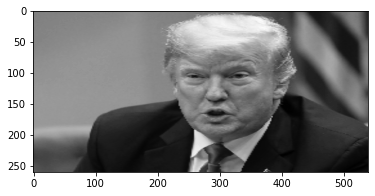

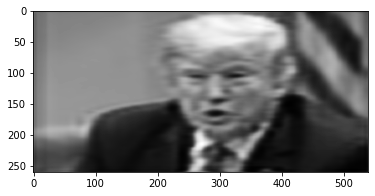

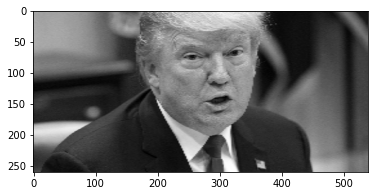

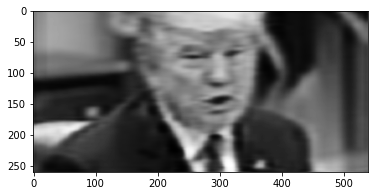

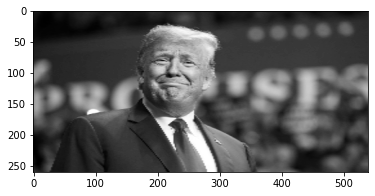

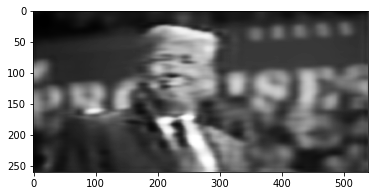

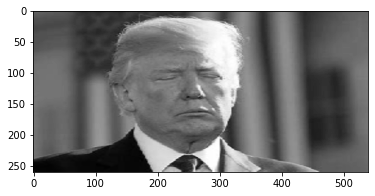

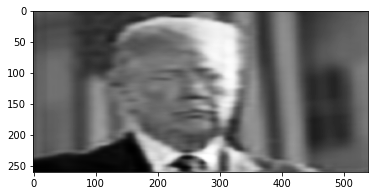

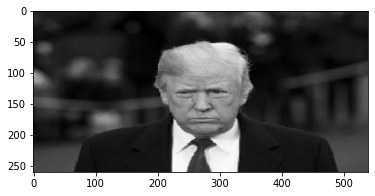

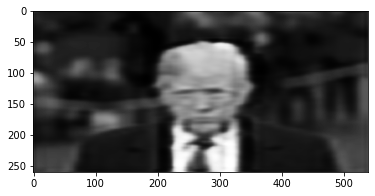

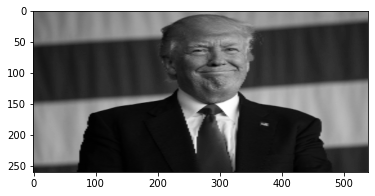

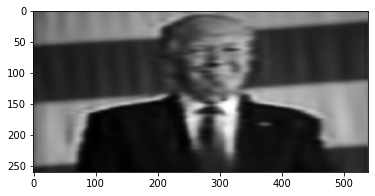

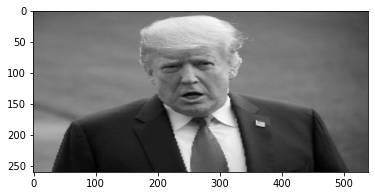

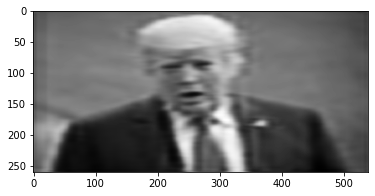

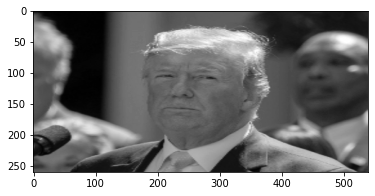

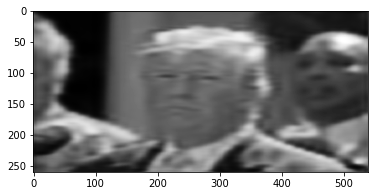

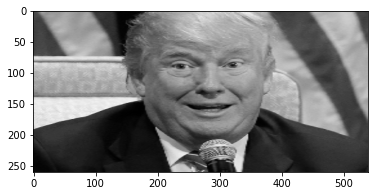

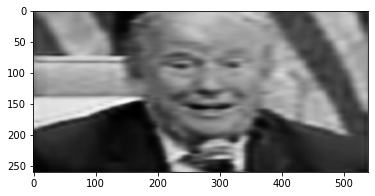

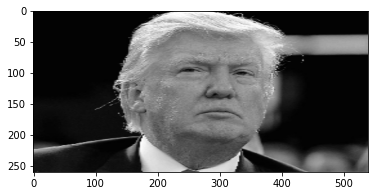

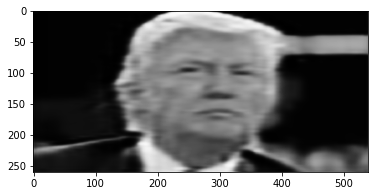

In [28]:
import matplotlib.pyplot as plt
import cv2
test_images_path  = 'dataset/Trump'
test_images = sorted(os.listdir(test_images_path))
X_test = []
for img in test_images:
    img_path = os.path.join(test_images_path, img)
    im = load_img(img_path, color_mode = 'grayscale', target_size = (540, 260))
    im = img_to_array(im).astype('float32')/255
    X_test.append(im)
    
X_test = np.array(X_test)

hehe=autoencoder.predict(X_test)


for i in range(10):
    plt.imshow(cv2.resize(X_test[i],(540,260)),cmap='gray')
    plt.show()
    plt.imshow(cv2.resize(hehe[i],(540,260)),cmap='gray')
    plt.show()